# side-note: coding best practices
- document / comment the code! e.g.:

```python
def foo(bar):
    """
    always use a docstring to describe functions:                              
    dummy function for test sake
    """
    assert bar!=False
    # dont forget to comment code
    #
    # with the try except method one can catch exceptions/errors in try:
    # even if there is a syntax error or a csv file that one tries to load does
    # not exist, the python code will not terminate with an error, but jump to
    # the code in the except block and continue the script from there
    try:
        df=pd.read_csv("some_optional_file_that_is_nice_to_have_but_can_be_ski\
        pped_as_well_if_it_does_not_exist.csv")
    except:
        print("continue the python script from here on")
    # return the results of the function to the line that calls the function
    return bar
```
- limit the length of lines to 79 characters
    - to break a long line (e.g. in `print("")`) on several lines, the `\` character can be used at the desired end of the line (as e.g. above in try:)
    - one can always break a line after a `,` e.g. in function parameter lists
- use markdown cells in ipynb to save e.g. tables/df outputs, this makes it easier to write a report in markdown format later

## importing functions from own python programs:
import functions from own .py files:

if we use .py files instead of .ipynb files, we can define functions in these .py files and import them (both in .py and .ipynb files). This works as follows:

> in notebook/file that imports a function from other file:
```python
import sys
sys.path.append("../") # to be able to import functions from python files outside of its own directory
from filename import function
import filename.function
```
> in .py file that contains the function to be imported ("filename.py"):
```python
# ...
def function(df):
    # do something
    return df
# if something is done in the imported file (apart from defining functions), one does not want to execute this content:
if __name__ == '__main__':
    # do some stuff, e.g.:
    df =pd.read_csv("some.csv")
    processed_df=function(df)
```

In [12]:
### import public python packages
import sys
import os
import numpy as np
import pandas as pd
import itertools
# import tabulate as tab

# time
import datetime as dt
from time import time

# machine learning
import sklearn
import pickle
import joblib
#import interactions
#import scikitplot
import xgboost
import imblearn

# math / stats
import scipy.special
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api

# plotting
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.basemap import Basemap
import seaborn as sns
from pandas.plotting import scatter_matrix
import bokeh
from geopy import distance 
from geopy.geocoders import Nominatim
import geopy

"""
requirements generated from copy of this ipynb using pipreqs:

python==3.10
basemap==1.3.6
basemap_data==1.3.2
bokeh==3.1.0
imbalanced_learn==0.10.1
ipython==8.12.0
joblib==1.1.1
matplotlib==3.5.3
numpy==1.23.5
pandas==1.5.3
scikit_learn==1.2.2
scipy==1.10.1
seaborn==0.12.2
statsmodels==0.13.5
xgboost==1.7.3
"""

'\nrequirements generated from copy of this ipynb using pipreqs:\n\npython==3.10\nbasemap==1.3.6\nbasemap_data==1.3.2\nbokeh==3.1.0\nimbalanced_learn==0.10.1\nipython==8.12.0\njoblib==1.1.1\nmatplotlib==3.5.3\nnumpy==1.23.5\npandas==1.5.3\nscikit_learn==1.2.2\nscipy==1.10.1\nseaborn==0.12.2\nstatsmodels==0.13.5\nxgboost==1.7.3\n'

### set some default settings
- for plotting (colors/colorbars/fonts...)
    - I advice to use... `viridis` as continuous colormap
    - ... `RdBu` as diverging colormap
    - ... not more than 5 colors in a plot

In [13]:
'''
RdBu=plt.cm.RdBu							#diverging red to blue
twilight_shifted=plt.cm.twilight_shifted	#diverging blue to red (black)
viridis=plt.cm.viridis						#blue to light yellow
inferno=plt.cm.inferno						#black to white!
gray=plt.cm.gray							#black to white!
colors=["black" 000000 0,0,0,
        "darkred" 8b0000 139,0,0,
        "tab:blue" 1f77b4 31,119,180,
        "tab:orange" ff7f0e 255,127,14,
        "lightgray" d3d3d3 211,211,211]
brightness=[0,27,44,65,83]
'''

# set a plotting style for matplotlib
def get_cmap_colors(cmap_min,cmap_max,steps,cmap):
	cmap=matplotlib.cm.get_cmap(cmap)
	return cmap(np.linspace(cmap_min,cmap_max,steps))
colors=["black", "darkred", "tab:blue", "tab:orange","lightgray"]
gray=plt.cm.gray
matplotlib.rcParams['agg.path.chunksize'] = 10000
matplotlib.rcParams.update({'font.size': 13})
#to be matched with markdown font:
matplotlib.rcParams['mathtext.fontset'] ='stix'
matplotlib.rcParams['font.family'] ='STIXGeneral'

marker = itertools.cycle(['o', 'o', 'o', 'o', 'o', 's', 's', 's', 's', 's',
                          'd', 'd', 'd', 'd', 'd', '>', '>', '>', '>', '>',
                          '*', '*', '*', '*', '*', 'X', 'X', 'X', 'X', 'X']) 
cc = (matplotlib.cycler(marker=['None','o', 's','d','>','*','X'])
      * matplotlib.cycler(linestyle=['-', '--', '-.', ':'])
      * matplotlib.cycler(color=[colors[2],
                                 colors[3],colors[1],colors[4],colors[0]]))
matplotlib.rcParams['axes.prop_cycle'] = cc
cmap=plt.cm.viridis
x=np.linspace(0,100,10)
y=np.linspace(0,100,10)
"""
for i in range(50):
    plt.scatter(x,i*y,marker=next(marker))
plt.show()
for i in range(50): plt.plot(x,i*y)
"""

pd.set_option('display.max_columns', None)

In [14]:
# convert object variables to get a more meaningfull output of describe:
def data_preprocessing_for_visualization(df):
    """
    description:
    -Convert variables in df to more useful variables for the modeling later on
    -Add new varibles by feature engineering
    -Changes are made directly on the df given to the function
    -Further preprocessing including NaN treatment and scaling are done in
     another function
    returns: preprocessed df (for plotting and data audit)
    """
    # change type of Date to datetime format
    df.Date = pd.to_datetime(df.Date, format = "%Y-%m-%d", exact = True)
    # create new date variables
    df["Day"] = df.Date.dt.day # not a relevant variable for plotting
    df["Month"] = df.Date.dt.month
    df["Year"] = df.Date.dt.year
    
    # add coordinates to locations including altitude and number/identifier of
    # nearest bureau station
    df_temp=pd.DataFrame({"Location":df.Location.unique(),
 "NearestBureauStationNr":["072160", "067108", "048027", "059151", "053115",
"061055", "061366", "200288", "067113", "067105", "066214", "066037", "072150",
"061078", "068228", "070351", "070339", "070349", "089002", "081123", "085072",
"086282", "086338", "076031", "078015", "090171", "086068", "090194", "040913",
"031011", "040764", "032040", "023034", "026021", "023373", "016001", "009500",
"109521", "009053", "009021", "009225", "012071", "009998", "094029", "091237",
"015590", "014015", "014932", "015635"],
 "Location_Latitude":[36.07, 33.90, 31.48, 30.32, 29.49, 32.92, 33.28, 29.04,
33.72, 33.60, 33.86, 33.95, 35.16, 32.79, 34.37, 35.31, 35.42, 35.53, 37.51,
36.74, 38.12, 37.67, 37.83, 34.24, 36.31, 38.31, 37.74, 37.92, 27.48, 16.87,
27.94, 19.25, 34.95, 37.75, 34.48, 31.16, 35.03, 34.03, 31.67, 31.93, 31.92,
32.99, 34.95, 42.89, 41.42, 23.80, 12.42, 14.52, 25.19],
 "Location_Longitude":[146.95, 150.73, 145.83, 153.12, 149.85, 151.80, 151.58,
167.94, 150.68, 150.78, 151.20, 151.17, 147.46, 151.84, 150.93, 149.20, 149.09,
148.77, 143.79, 144.33, 147.13, 144.83, 144.98, 142.09, 141.65, 141.47, 145.10,
141.26, 153.04, 145.75, 153.43, 146.77, 138.52, 140.77, 139.01, 136.81, 117.88,
115.06, 116.02, 115.98, 115.87, 121.62, 116.72, 147.33, 147.12, 133.89, 130.89,
132.38, 130.97],
 "Location_Elevation":[164, 81, 260, 4, 213, 33, 19, 112, 25, 19, 43, 6, 212,
8, 10, 577, 587, 1760, 435, 209, 5, 113, 8, 50, 139, 81, 66, 51, 8, 2, 3, 4, 2,
63, 275, 167, 3, 85, 40, 15, 25, 249, 73, 51, 5, 546, 30, 134, 492]})
    df = pd.merge(df, df_temp, on='Location', how='left')
    # towns with many occurences in Australia such that the station might
    # be wrong:
    # Richmond, (Mount Ginini, Portland, PearceRAAF, Perth
    # richmond RAAF 067105  33.60 150.78 19
    # richmond post office 030045 20.73 143.14  211
    #display(Markdown(df_temp.to_markdown(index=False)))
    
    # replace wind direction labels by angles (in radians from 0 to 2*pi):
    for i in df[["WindGustDir","WindDir9am","WindDir3pm"]]:
        df[i]=df[i].replace(["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                             "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"],
                            [j*np.pi/8 for j in range(16)])
    # create two new variables representing the wind direction as cosinus and
    # sinus part
    for i in df[["WindGustDir","WindDir9am","WindDir3pm"]]:
        df[str(i)+"_cos"] = np.round(np.cos(df[i]),2)
        df[str(i)+"_sin"] = np.round(np.sin(df[i]),2)
    
    # replace RainX by numerical value:
    # float type, cause there are NaN in vars: cannot create int type
    df.RainToday=df.RainToday.replace(["Yes","No"],[1,0])
    df.RainTomorrow=df.RainTomorrow.replace(["Yes","No"],[1,0])
    return df

In [4]:
def data_audit(df,
               target = "",
               descriptions = "",
               known = "",
               cat_quanti = "",
               comments = ""):
    """
    generate a markdown formatted table of varibale properties for a pandas
    dataframe
    
    arguments:
    mandatory:
    df = dataframe to audit
    optional:
    target = list of booleans stating if the respective variable of the df
        is a "feature": False or "target": True variable (for supervised ML)
    descriptions = list of strings describing each variable of the df
    known = list of booleans:
        True / False: variable is known / not-known before modeling/predicting
    cat_quanti = list of strings stating if the variable is categorical or
        numerical (discrete, continuous, time/date, text, image...)
    comments = list of strings with comments on each variable
    """
    nrs = list(range(df.shape[1]))
    names = df.columns
    if target == "":
        target = [False for i in np.zeros(df.shape[1])]
    if descriptions == "":
        descriptions= ["" for i in np.zeros(df.shape[1])]
    if known == "":
        known = ["" for i in np.zeros(df.shape[1])]
    if cat_quanti == "":
        cat_quanti = ["" for i in np.zeros(df.shape[1])]
    if comments == "":
        comments = ["" for i in np.zeros(df.shape[1])]
    dtypes = df.dtypes.values.astype(str)
    NaNs = df.isna().sum().values
    NaN_fraction = np.round(df.isna().sum().values/len(df)*100,1)
    
    
    
    # describe all variables (distribution, statistics)
    temp=df.describe(include="all", datetime_is_numeric=True)
    distribution = []
    for i in df.columns:
        if ("date" in str(df[i].dtype)) or ("time" in str(df[i].dtype)):
            distribution.append("- count = "+str(temp[i]["count"])\
                  +"<br>- min = "+str(temp[i]["min"])[:-9]\
                  +"<br>- max = "+str(temp[i]["max"])[:-9])# only include date
        elif i in df.select_dtypes(include = "O").columns:
            distribution.append("- count = "+str(temp[i]["count"])\
                  +"<br>- unique = "+str(temp[i]["unique"])\
                  +"<br>- top = "+str(temp[i]["top"])\
                  +"<br>- freq = "+str(temp[i]["freq"]))
        else:
            distribution.append("- count = "+str(int(temp[i]["count"]))\
                  +"<br>- min = "+str(np.round(temp[i]["min"],2))\
                  +"<br>- max = "+str(np.round(temp[i]["max"],2))\
                  +"<br>- 50% = "+str(np.round(temp[i]["50%"],2))\
                  +"<br>- mean = "+str(np.round(temp[i]["mean"],2))\
                  +"<br>- std = "+str(np.round(temp[i]["std"],2)))
    df_temp=pd.DataFrame({"number":nrs,"variable name":names,
                           "target":target,"description":descriptions,
                           "known a priori":known,"data type":dtypes,
                           "# NaNs":NaNs,"% NaN":NaN_fraction,
                           "variable type":cat_quanti,
                           "distribution":distribution,"Comments":comments},
                         index=names)
    df_temp=df_temp.loc[
    ["Date","Day","Month","Year","Location","NearestBureauStationNr",
    "Location_Latitude","Location_Longitude","Location_Elevation",
    "WindGustDir","WindGustDir_cos","WindGustDir_sin","WindDir9am",
    "WindDir9am_cos","WindDir9am_sin","WindDir3pm","WindDir3pm_cos",
    "WindDir3pm_sin","WindGustSpeed","WindSpeed9am", "WindSpeed3pm","MinTemp",
    "MaxTemp","Temp9am","Temp3pm","Evaporation","Humidity9am","Humidity3pm",
    "Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Sunshine",
    "Rainfall", "RainToday", "RainTomorrow"],:]
    table=df_temp.to_markdown(index=False)
    header = "# data audit\n"
    footer = "\n- number of rows and columns in dataframe : " + str(df.shape)
    return header + table + footer

In [ ]:
df=pd.read_csv("../data/weatherAUS.csv")
# check if there are duplicated entries in the df
print("\namount of duplicated entries:",df.duplicated().sum(),"\n")
# no duplicated entries found!
print("Amount of different locations:",len(df.Location.unique())) #49
#df.WindGustDir[df.WindGustDir.isna()==False]
print("Different WindGustDir values:",df.WindGustDir.unique())
print("Different RainToday/Tomorrow values:",df.RainToday.unique(),
      df.RainTomorrow.unique())
print(df.info())
print(df.describe())


#sns.lineplot(df.Date)
# check 
df.Location.value_counts()



df=data_preprocessing_for_visualization(df)
df.head()

# data audit

In [ ]:
print(df.groupby(df["Date"].dt.month).describe())

In [ ]:
# automated generation of a markdown table with variable properties
target = [False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          True,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False,
          False]
descriptions = ["[year-month-day]<br>date of weather observation",
"[str]<br>inofficial name/town of weather station",
"[ $^{\circ}$ C]<br>min T in (24h to 9am). Sometimes nearest whole degree",
"[ $^{\circ}$ C]<br>max T (24h to 9am). Sometimes nearest whole degree",
"[mm]<br>Precipitation (rainfall) (24 hours to 9am).\
 Sometimes nearest whole millimetre",
"[mm]<br>'Class A' pan evaporation (24h to 9am)",
"[h]<br>Bright sunshine (24h to 0am)",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>Direction of strongest gust\
 (24h to 0am)",
"[km/h]<br>Speed of strongest wind gust (24h to 0am)",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>averaged over 10min prior to\
 9am",
"[16 compass dirs. in radians (0 to $2\pi$)]<br>averaged over 10min prior to\
 3pm",
"[km/h]<br>averaged over 10min prior to 9am",
"[km/h]<br>averaged over 10min prior to 3pm",
"[%]<br>Relative humidity at 9am",
"[%]<br>Relative humidity at 3pm",
"[hPa]<br>Atmospheric pressure reduced to mean sea level at 9am",
"[hPa]<br>Atmospheric pressure reduced to mean sea level at 3pm",
"[octas]<br>Fraction of sky obscured by cloud at 9 am ",
"[octas]<br>Fraction of sky obscured by cloud at 3pm",
"[ $^{\circ}$ C]<br>T at 9am",
"[ $^{\circ}$ C]<br>T at 3pm",
"1 if precipitation (mm) (24h to 9am) exceeds 1mm, otherwise 0",
"1 if precipitation (mm) (24h to 9am) exceeds 1mm, otherwise 0",
"[day]<br>day of weather observation",
"[month]<br>month of weather observation",
"[year]<br>year of weather observation",
"Identifier string number of weather station closest to given location",
"[ $^{\circ}$ ] approx. latitude coordinate of given location",
"[ $^{\circ}$ ] approx. longitude coordinate of given location",
"[masl] approx. elevation coordinate of given location",
"[cosine of direction] for WindGustDir",
"[sine of direction] for WindGustDir",
"[cosine of direction] for WindDir9am",
"[sine of direction] for WindDir9am",
"[cosine of direction] for WindDir3pm",
"[sine of direction] for WindDir3pm"]
known = [True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        False,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True,
        True]
cat_quanti = ["cat ord<br>date",
              "cat num<br>should be<br>ord",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "cat ord",
              "num con",
              "cat ord",
              "cat ord",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "num con",
              "num dis",
              "num dis",
              "num con",
              "num con",
              "cat bin",
              "cat bin",
              "num dis",
              "num dis",
              "num dis",
              "cat num",
              "num con",
              "num con",
              "num con",
              "num dis",
              "num dis",
              "num dis",
              "num dis",
              "num dis",
              "num dis"]
comments = ["convert",
            "convert",
            "",
            "",
            "",
            "",
            "",
            "convert",
            "",
            "convert",
            "convert",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "",
            "convert",
            "convert",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added",
            "added"]
table=data_audit(df,target = target, descriptions = descriptions,
                 known = known,cat_quanti = cat_quanti, comments = comments)
display(Markdown(table))
print(table)
# put the dataframe variables in a more useful order

# data audit

## Description / Legend
- types of variables:
    - numerical (num)
        - discrete (dis) : finite amount of possible values
        - continuous (con) : infinite amount of possible values
    - categorical (cat)
        - ordinal (ord) : have an order
        - numerical (num) : categories without order/rank
        - binary (bin) : boolean, True or False, 0 or 1
    - date/time (stamp)
    - text
    - image
    - sound


# data preprocessing ideas / questions
1. Date -> year, month, day
2. change or add a coordinate instead of Location name
    - how to teach model closer distance between locations/directions?
3. how to convert WindGustDir: periodic, not 0-10 and not get_dummies():
    - model can gain info from knowing, that S is opposite/farthest away from N
    - 16 directions->16 vars, dir:16 next to dir 15, next next 14...
4. different time zones (relevant for 9am 3pm?)
    - -> no, cause weather should be measured and compared relative to position of sun, not relative to "random/human" set time zone!?
5. maxwindgusttime also available on bom website, use it?
6. use 9am and 3pm values or replace by average and trend (sth like 3pm val - 9am val?)
7. which numerical vars are `discrete`? Only the cloud coerage? 0-8 and 9 for "no horizon visible"/fog
8. show distribution of each variable in markdown : none<img src="../data/plots/test.JPG" alt="drawing" width="20"/>
9. from corr heatmap: the 9am 3pm variables and min/max T are strongly correlated -> action needed?

# check distribution of missing values

variables with largest NaN fraction per Location


,Sunshine,Cloud9am,Cloud3pm,Evaporation,Pressure9am,Pressure3pm
Location,,,,,,
Adelaide,0.45,1.00,1.00,0.47,0.00,0.00
Albany,0.17,0.01,0.23,0.10,0.01,0.01
Albury,1.00,0.58,0.53,1.00,0.00,0.00
AliceSprings,0.17,0.11,0.12,0.07,0.00,0.00
BadgerysCreek,1.00,1.00,1.00,1.00,0.06,0.06
Ballarat,1.00,0.18,0.34,1.00,0.01,0.01
Bendigo,1.00,0.32,0.25,0.61,0.00,0.00
Brisbane,0.02,0.00,0.00,0.01,0.00,0.00
Cairns,0.16,0.07,0.08,0.12,0.00,0.00


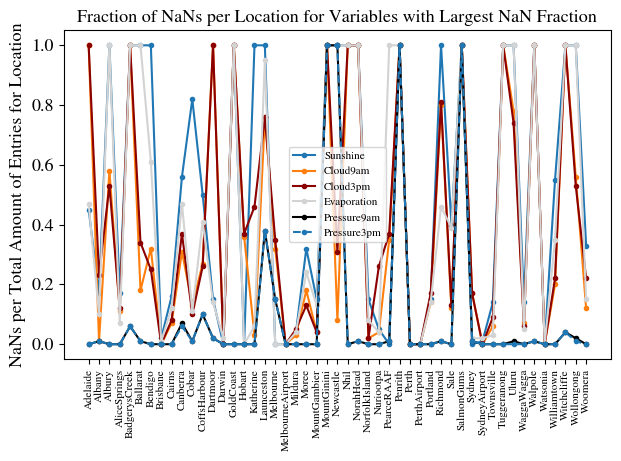

In [6]:
#print("Nans per variable and Location")
#display(df.groupby("Location").agg(lambda x: np.round(x.isna().sum()
#/x.shape[0],2)))
print("variables with largest NaN fraction per Location")
temp = df[["Location","Sunshine","Cloud9am","Cloud3pm","Evaporation",
           "Pressure9am","Pressure3pm"]].\
        groupby("Location").agg(lambda x: np.round(x.isna().sum()/x.shape[0],
                                                   2))
display(temp)
for variable in temp:
    plt.plot(temp.index,temp[variable],label=variable,marker=".")
plt.xticks(rotation=90,fontsize=8)
plt.ylabel("NaNs per Total Amount of Entries for Location")
plt.title("Fraction of NaNs per Location for\
 Variables with Largest NaN Fraction",fontsize=13)
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig("../data/plots/NaN_fraction_per_Location.png",dpi=300)
del temp

# plotting the slightly preprocessed data


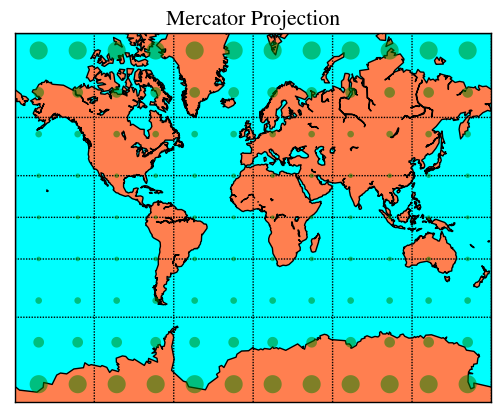

In [14]:
# check the projection used in the map
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')
for y in np.linspace(m.ymax/20,19*m.ymax/20,9):
    for x in np.linspace(m.xmax/20,19*m.xmax/20,12):
        lon, lat = m(x,y,inverse=True)
        poly = m.tissot(lon,lat,1.5,100,\
                        facecolor='green',zorder=10,alpha=0.5)
plt.title("Mercator Projection")
plt.show()

In [19]:
# preprocess data for plotting (remove Day and reorder variables)
df=df.loc[:,["Date","Day","Month","Year","Location","NearestBureauStationNr",
    "Location_Latitude","Location_Longitude","Location_Elevation",
    "WindGustDir","WindGustDir_cos","WindGustDir_sin","WindDir9am",
    "WindDir9am_cos","WindDir9am_sin","WindDir3pm","WindDir3pm_cos",
    "WindDir3pm_sin","WindGustSpeed","WindSpeed9am", "WindSpeed3pm","MinTemp",
    "MaxTemp","Temp9am","Temp3pm","Evaporation","Humidity9am","Humidity3pm",
    "Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Sunshine",
    "Rainfall", "RainToday", "RainTomorrow"]]
#df = df.drop("Day",axis=1)

[  0.        333.6038812 865.0051622]


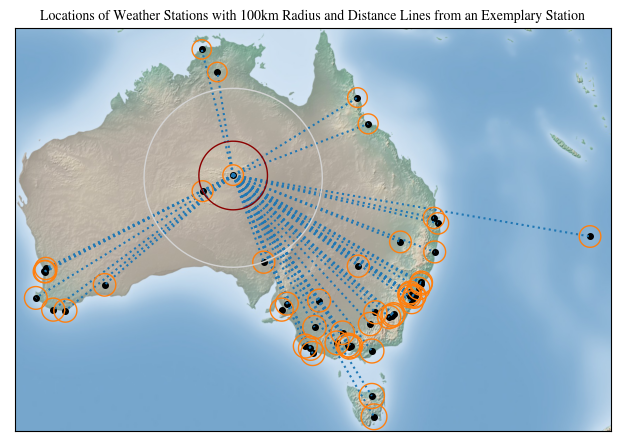

In [21]:
Location_unique_indices=df.reset_index().groupby(['Location'])\
['index'].min().to_list()
lats = df.loc[Location_unique_indices,"Location_Latitude"]
lons = df.loc[Location_unique_indices,"Location_Longitude"]
elevs = df.loc[Location_unique_indices,"Location_Elevation"]
lowerleft_corner_lon = np.min(df.Location_Longitude)-2
lowerleft_corner_lat = -np.max(df.Location_Latitude)-1
upperright_corner_lon = np.max(df.Location_Longitude)+2
upperright_corner_lat = -np.min(df.Location_Latitude)+2
m = Basemap(projection='merc',
            llcrnrlon=lowerleft_corner_lon,
            urcrnrlon=upperright_corner_lon,
            llcrnrlat=lowerleft_corner_lat,
            urcrnrlat=upperright_corner_lat)
x, y = m(lons,-lats)
m.shadedrelief()
m.scatter(x,y,marker='o',s=16,color="k")
#for i, txt in enumerate(df.loc[Location_unique_indices,"Location"]):
#    plt.text(x.values[i],y[i],txt,fontsize=9)

a=3
b=2

def radius_for_tissot(dist_km):
    """
    get radius of circle on surface of the earth (a sphere) in degrees from km
    input. Division by approximate Earth radius at location of Australia
    (6373km).
    """
    return np.rad2deg(dist_km/6373.)

#m.tissot(radius_deg=radius_for_tissot(distance_2d),
#lon_0=lons.values[a], lat_0=-lats.values[a], npts=36, zorder=10,alpha=0.5)

for lon,lat in zip (lons.values,-lats.values):
        m.tissot(lon,lat,radius_for_tissot(100),
                 100,zorder=10,facecolor="None",edgecolor="tab:orange")
m.tissot(lons.values[3],-lats.values[3],radius_for_tissot(333),
         100,zorder=10,facecolor="None",edgecolor="darkred")
m.tissot(lons.values[3],-lats.values[3],radius_for_tissot(865),
         100,zorder=10,facecolor="None",edgecolor="lightgray")

distance_2d = np.sort([distance.distance([-lats.values[a],lons.values[a]],
                                         [-lats.values[b],lons.values[b]]).km
                       for b in range(0,len(lats.values))])[:3]
print(distance_2d)
distance_2d=[distance.distance([-lats.values[a],lons.values[a]],
                               [-lats.values[b],lons.values[b]]).km
             for b in range(0,len(lats.values))]

geolocator = Nominatim(user_agent="my_locator")
locations = [geolocator.reverse(geopy.point.Point(lat, lon))
             for lat,lon in zip (-lats.values,lons.values)]
#for i in range (len(locations)):
#    print(locations[i].address,"\n")

for i in range(len(x.values)-1):
   plt.plot([x.values[a], x.values[i+1]], [y[a],y[i+1]],
            color="tab:blue", linestyle=":", marker="None")

plt.title('Locations of Weather Stations with 100km\
 Radius and Distance Lines from an Exemplary Station',fontsize=10)

plt.tight_layout()
#plt.show()
plt.savefig("../data/plots/nearby_locations_test.png",dpi=300)

no long/lat found for Location 1 : BadgerysCreek
no long/lat found for Location 3 : CoffsHarbour
no long/lat found for Location 6 : NorahHead
no long/lat found for Location 7 : NorfolkIsland
no long/lat found for Location 11 : SydneyAirport
no long/lat found for Location 12 : WaggaWagga
no long/lat found for Location 17 : MountGinini
no long/lat found for Location 21 : MelbourneAirport
no long/lat found for Location 33 : MountGambier
no long/lat found for Location 38 : PearceRAAF
no long/lat found for Location 39 : PerthAirport
no long/lat found for Location 41 : SalmonGums
no long/lat found for Location 45 : AliceSprings
Looks like Locations not separated by spaces are not found: add spaces using regex? (ToDo)


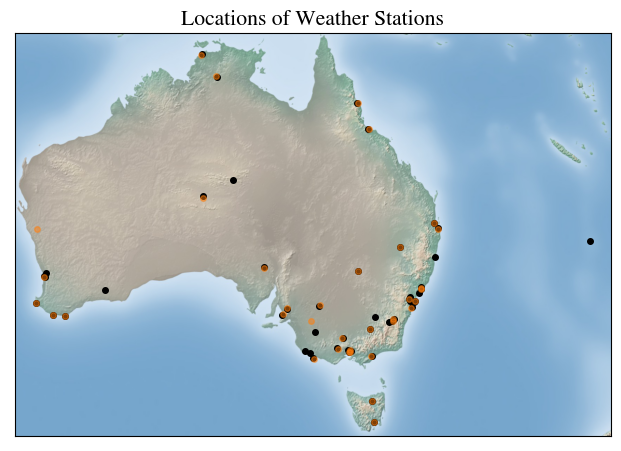

In [22]:
locations = [geolocator.geocode(location+", Australia")
             for location in df.Location.unique()]
locs_lats=[]
locs_lons=[]
for i in range(len(locations)):
    try:
        locs_lats.append(locations[i].latitude)
        locs_lons.append(locations[i].longitude)
    except:
        print("no long/lat found for Location",i,":",df.Location.unique()[i])
print("Looks like Locations not separated by spaces are not found:\
 add spaces using regex? (ToDo)")
m = Basemap(projection='merc',
            llcrnrlon=lowerleft_corner_lon,
            urcrnrlon=upperright_corner_lon,
            llcrnrlat=lowerleft_corner_lat,
            urcrnrlat=upperright_corner_lat)
x, y = m(lons,-lats)
x1,y1 = m(locs_lons,locs_lats)
m.shadedrelief() #
m.scatter(x,y,marker='o',s=16,color="k")
m.scatter(x1,y1,marker='o',s=16,color="tab:orange",alpha=0.5)
plt.title('Locations of Weather Stations')
plt.tight_layout()
plt.show()

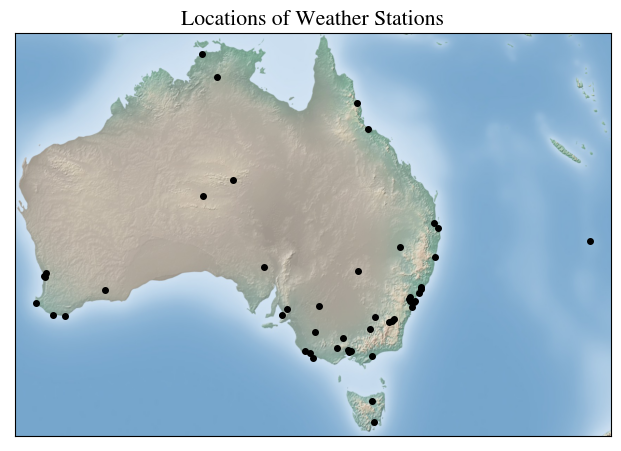

In [11]:
"""
#plot using bokeh, interactive but difficult to set x/y ranges:

import xyzservices.providers as xyz

fr.ipynb_checkpoints/m bokeh.plotting import figure, show

p = figure(x_range=(500000, 900000), y_range=(-10000000, -15000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(xyz.OpenStreetMap.Mapnik)
p.circle(y=-df.Location_Latitude, x=df.Location_Longitude, size=15,
fill_color="blue", fill_alpha=0.8)
show(p)
"""


Location_unique_indices=df.reset_index().groupby(['Location'])\
['index'].min().to_list()
names = df.loc[Location_unique_indices,"Location"]
lats = df.loc[Location_unique_indices,"Location_Latitude"]
lons = df.loc[Location_unique_indices,"Location_Longitude"]
elevs = df.loc[Location_unique_indices,"Location_Elevation"]
lowerleft_corner_lon = np.min(df.Location_Longitude)-2
lowerleft_corner_lat = -np.max(df.Location_Latitude)-1
upperright_corner_lon = np.max(df.Location_Longitude)+2
upperright_corner_lat = -np.min(df.Location_Latitude)+2
m = Basemap(projection='merc',
            llcrnrlon=lowerleft_corner_lon,
            urcrnrlon=upperright_corner_lon,
            llcrnrlat=lowerleft_corner_lat,
            urcrnrlat=upperright_corner_lat)
#,lon_0=140, lat_0=-np.mean(df.Location_Latitude),
x, y = m(lons,-lats)
#m.drawmapboundary(fill_color='#99ffff')
#m.fillcontinents(color='#cc9966',lake_color='#99ffff')
m.shadedrelief() #
#m.bluemarble()
#m.drawlsmask()
#m.etopo()
#m.drawcountries()
#m.drawstates(color="darkred")
#m.drawrivers(color="tab:blue")
#m.drawlsmask()
m.scatter(x,y,marker='o',s=16,color="k")
"""for i in range(0,len(names)):
    #print(i,names.values[i])
    if (names.values[i] in ['Canberra', 'Hobart' ,'Darwin',
    'Melbourne', 'Brisbane', 'Perth',
 'AliceSprings' ,'Cairns', 'Townsville' ,'MountGambier' ,'NorfolkIsland',
 'Mildura', 'Sale', 'Cobar' ,'Williamtown', 'PerthAirport', 'CoffsHarbour',
 'Moree' ,'MelbourneAirport' ,'WaggaWagga', 'SydneyAirport', 'Watsonia',
 'Portland' ,'Nuriootpa', 'Woomera','Sydney']):
            m.scatter(x.values[i],y[i],marker='o',s=16,color="k")
    if ((names.values[i] in ["Katherine","Nhil","Uluru"]) or 
    (names.values[i] not in ['Canberra', 'Hobart' ,'Darwin', 'Melbourne',
    'Brisbane', 'Perth',
 'AliceSprings' ,'Cairns', 'Townsville' ,'MountGambier' ,'NorfolkIsland',
 'Mildura', 'Sale', 'Cobar' ,'Williamtown', 'PerthAirport', 'CoffsHarbour',
 'Moree' ,'MelbourneAirport' ,'WaggaWagga', 'SydneyAirport', 'Watsonia',
 'Portland' ,'Nuriootpa', 'Woomera','Sydney'])):
            m.scatter(x.values[i],y[i],marker='^',s=16,color="r")"""
#for i, txt in enumerate(df.loc[Location_unique_indices,"Location"]):
#    plt.text(x.values[i],y[i],txt,fontsize=9)
# ToDo: add circle of x km radius: test best distance for avg over nearby stat.
# ToDo: user gives location: geopy gives coord, coord give closest weather
# stations, weather stations give rain prediction (avg, jsut nearest...)
 # from geopy.geocoders import Nominatim
 # geolocator = Nominatim(user_agent="specify_your_app_name_here")
 # location = geolocator.geocode("175 5th Avenue NYC")
 # or reverse: location = geolocator.reverse("52.509669, 13.376294")
 # print(location.address) print((location.latitude, location.longitude))
 # print(location.raw)

plt.title('Locations of Weather Stations')
plt.tight_layout()
#plt.show()
plt.savefig("../data/plots/map_of_locations.png",dpi=300)

/tmp/ipykernel_3158/350552558.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(df.corr(),


humidity in afternoon cloud coverage and sunshine correlate (linear) with target (reintmrw)
the 9am 3pm variables and min/max T are strongly correlated -> action needed?


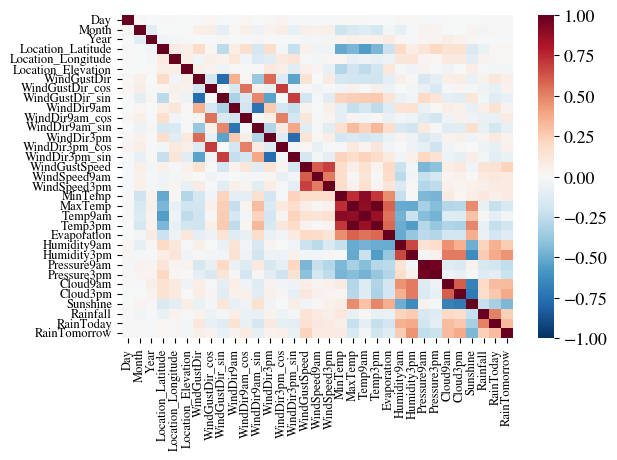

In [24]:
#df.info()
"""
df.assign(Location=df.Location.astype('category').cat.codes,
                      WindGustDir=df.WindGustDir.astype('category').cat.codes,
                      WindDir9am=df.WindDir9am.astype('category').cat.codes,
                      WindDir3pm=df.WindDir3pm.astype('category').cat.codes,
                      Date=df.Date.astype('category').cat.codes)
"""
ax=sns.heatmap(df.corr(),
                      annot=False, cmap='RdBu_r', vmin=-1, vmax=1,
                      xticklabels=True, yticklabels=True);
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
plt.tight_layout()
plt.savefig("../data/plots/heatmap_preprocessed_data.png",dpi=300)
print("humidity in afternoon cloud coverage and sunshine correlate (linear)\
 with target (reintmrw)")
print("the 9am 3pm variables and min/max T are strongly correlated ->\
 action needed?")

In [ ]:
bp = sns.catplot(y="Rainfall", x="Location", kind = 'boxen',data = df)
plt.title("Distribution of Rainfall by Location", fontsize=12)
plt.xlabel("Location")
plt.ylabel("Rainfall [mm]")
#plt.semilogy()
plt.xticks(rotation=90,fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
#plt.title('Number of rainy days by location')
sns.countplot(x = 'Location', data = df,color=colors[2]);
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Location")
plt.ylabel("Amount of Entries per Location")
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/entries_per_location.png",dpi=300)
print(df.Location.unique())
print(df.Location.value_counts())
print(df.loc[df["Location"]=="Katherine"].isna().sum())
print("Katherine, Nhil and Uluru Locations have exceptionally few entries\
 (50% less than all other Locations) -> remove them?")





In [ ]:
plt.title('Fraction of Rainy Days per Location')
plt.plot(df.groupby("Location").mean()["RainToday"].index,
         df.groupby("Location").mean()["RainToday"],
         color=colors[2]);
print(df.groupby("Location").mean()["RainToday"])
plt.xticks(rotation=90,fontsize=8)
plt.xlabel("Location")
plt.ylabel("Fraction of Rainy Days")
#plt.show()
plt.tight_layout()
#plt.show()
plt.savefig("../data/plots/fraction_rainydays_per_location.png",dpi=300)

In [ ]:
plt.scatter(df["MinTemp"], df["MaxTemp"], alpha=0.2)
plt.title("Maximum Temperature vs Minimum Temperature")
plt.xlabel("Minimum Temperature [°C]")
plt.ylabel("Maximum Temperature [°C]")
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/min_vs_max_T.png",dpi=300)

In [ ]:
plt.scatter(df["Pressure9am"], df["Pressure3pm"],c=df["RainTomorrow"], alpha=1)
plt.title("Pressure Change during Day")
plt.xlabel("Morning Pressure [hPa]")
plt.ylabel("Afternoon Pressure [hPa]")
plt.colorbar(label="RainTomorrow [1=Yes, 0=No]")
#plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/9am_vs_3pm_pressure_RainTomorrow.png",dpi=300)

In [ ]:
mean_per_month=df.groupby(df["Date"].dt.month).mean()
temp=0
for i in mean_per_month.columns:
    if ((i!="Month")
    and (i!="Year")
    and (i!="Location_Latitude")
    and (i!="Location_Longitude")
    and (i!="Location_Elevation")
    and (i!="WindGustDir_cos")
    and (i!="WindGustDir_sin")
    and (i!="WindDir9am_cos")
    and (i!="WindDir9am_sin")
    and (i!="WindDir3pm_cos")
    and (i!="WindDir3pm_sin")):
        plt.plot(mean_per_month.index,
                 mean_per_month[i]/np.max(mean_per_month[i]),
                 label=i)
plt.ylim(0,1)
plt.ylabel("mean of variable scaled by maximum")
plt.xlabel("month")
plt.xlim(1,12)
plt.xticks(range(1,13), ['Jan', 'Feb', 'March', "April", "May","June","July",
                         "Aug", 'Sept',"Oct","Nov", 'Dec'],rotation=45)
plt.legend(fontsize=9,loc=(1,0))
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/mean_of_each_variable_per_month.png",dpi=300)
plt.clf()
mean_per_month=df.groupby(df["Date"].dt.year).mean()
for i in mean_per_month.columns:
    if ((i!="Month")
    and (i!="Year")
    and (i!="Location_Latitude")
    and (i!="Location_Longitude")
    and (i!="Location_Elevation")
    and (i!="WindGustDir_cos")
    and (i!="WindGustDir_sin")
    and (i!="WindDir9am_cos")
    and (i!="WindDir9am_sin")
    and (i!="WindDir3pm_cos")
    and (i!="WindDir3pm_sin")):
        plt.plot(
            mean_per_month.index,mean_per_month[i]/np.max(mean_per_month[i]),
            label=i)
plt.ylim(0,1)
plt.ylabel("Mean of Variable Scaled by Maximum")
plt.xlabel("Year")
#plt.xlim(1,12)
plt.xticks(rotation=45)
plt.legend(fontsize=9,loc=(1,0))
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/mean_of_each_variable_per_year.png",dpi=300)

In [ ]:
"""sns.catplot(x=df.groupby(df["Date"].dt.month).indices,
            y=df.groupby(df["Date"].dt.month).MinTemp,kind="violin")

df.groupby(df["Date"].dt.month).indices'"""

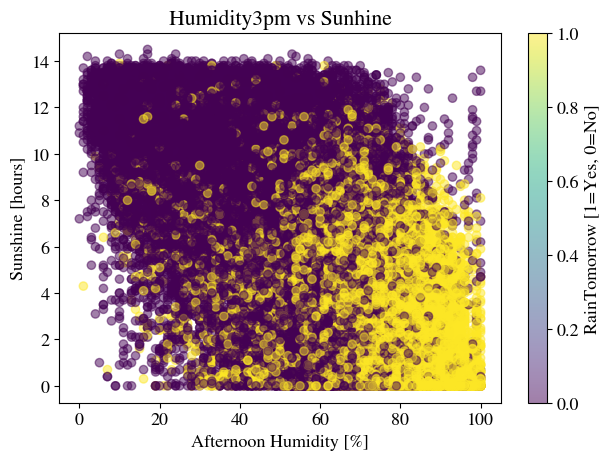

In [17]:
plt.scatter(df["Humidity3pm"], df["Sunshine"],c=df["RainTomorrow"], alpha=0.5)
plt.title("Humidity3pm vs Sunhine")
plt.xlabel("Afternoon Humidity [%]")
plt.ylabel("Sunshine [hours]")
plt.colorbar(label="RainTomorrow [1=Yes, 0=No]")
#plt.legend()
#plt.show()
plt.tight_layout()
plt.savefig("../data/plots/Humidity3pm_vs_Sunshine_RainTomorrow.png",dpi=300)

In [ ]:
from data_preprocessing_JP import *

df=pd.read_csv("../data/weatherAUS.csv")
df, X_train, X_test, y_train, y_test = data_preprocessing(df)

df_date_vs_locs_temp = []
variable = "Rainfall"
for (i,location) in enumerate(df.Location.unique()):
    temp = pd.DataFrame(df.loc[df.Location == location,
                                               ["Date", variable]])
    temp.columns = ["Date", location]
    df_date_vs_locs_temp.append(temp)
df_date_vs_locs = df_date_vs_locs_temp[0]
for i in range(0, len(df_date_vs_locs_temp) - 1):
    df_date_vs_locs = df_date_vs_locs.merge(\
                 right = df_date_vs_locs_temp[i+1], on="Date",\
                                            how="outer")
df_date_vs_locs = df_date_vs_locs.sort_values(by="Date")\
            .reindex(["Date",*sorted(df_date_vs_locs.columns[1:])],\
                     axis=1)
#display(df_date_vs_locs)

Location_unique_indices=df.reset_index().groupby(['Location'])\
['index'].min().to_list()
names = df.loc[Location_unique_indices,"Location"]
lats = df.loc[Location_unique_indices,"Location_Latitude"]
lons = df.loc[Location_unique_indices,"Location_Longitude"]
elevs = df.loc[Location_unique_indices,"Location_Elevation"]
lowerleft_corner_lon = np.min(df.Location_Longitude)-2
lowerleft_corner_lat = -np.max(df.Location_Latitude)-1
upperright_corner_lon = np.max(df.Location_Longitude)+2
upperright_corner_lat = -np.min(df.Location_Latitude)+2
for i in range(0,len(names)):
    m = Basemap(projection='merc',
            llcrnrlon=lowerleft_corner_lon,
            urcrnrlon=upperright_corner_lon,
            llcrnrlat=lowerleft_corner_lat,
            urcrnrlat=upperright_corner_lat)
    x, y = m(lons,-lats)
    m.shadedrelief()
    m.scatter(x,y,marker='o',s=16,color=matplotlib.cm.get_cmap('RdBu_r')\
      (df_date_vs_locs.iloc[:,1:].corr().sort_index().sort_index(axis=1)\
      [names.iloc[i]].values))
    for j in range(0,len(names)):
        plt.text(x.values[j],y[j],np.round(df_date_vs_locs.iloc[:,1:]\
                .corr().sort_index().sort_index(axis=1).loc[names.iloc[i],\
                names.iloc[j]],1),fontsize=9)
    plt.savefig("../data/plots/map_correlation_between_locations_for_"
                +variable+"_and_Location_"+names.iloc[i]+".png",dpi=300)
    plt.clf()

for i in df_date_vs_locs.iloc[:,1:].corr():
    df_date_vs_locs.iloc[:,1:].corr().names.values
ax=sns.heatmap(df_date_vs_locs.iloc[:,1:].corr().sort_index()\
               .sort_index(axis=1),
               #df.corr(method=pearsonr_pval) #.where(empty_df.corr()>0.5),
               annot=False, cmap='RdBu_r', vmin=-1, vmax=1,
               xticklabels=True, yticklabels=True);
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
plt.tight_layout()
plt.savefig("../data/plots/heatmap_correlation_between_locations_for_"
            +variable+".png",dpi=300)

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/weatherAUS.csv")
display(df[100000:100005])
df[100000:100005].to_markdown()